In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from openpyxl import Workbook
import random
#%matplotlib inline
#_____________patameters
split_ratio=0.8
#_____________reading input
data = pd.read_csv('/content/drive/MyDrive/Bias_correction_ucl.csv')
#_____________selecting columns
new_data=data.loc[:,('Present_Tmax','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH'\
               ,'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'\
               ,'lat','lon','DEM','Slope','Solar radiation','Next_Tmax')]
# _____________fill null value
new_data.fillna(method ='ffill',inplace = True)
print('sum of null value in data:')
print(new_data.isnull().sum())
#__________________normalizing data
data=(new_data-new_data.min())/(new_data.max()-new_data.min())
data=np.array(data)


sum of null value in data:
Present_Tmax        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64


*spliting* data

In [ ]:
def spilit_data(data):
  split_line_number = int(np.shape(data)[0] * split_ratio)
  x_train = data[:split_line_number, :len(data[0])-1]
  x_test = data[split_line_number:, :len(data[0])-1]
  y_train = data[:split_line_number, len(data[0])-1]
  y_test = data[split_line_number:, len(data[0])-1]
  return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=spilit_data(data)

In [ ]:
def sigmoid(x):
  return 1/(1+(math.e)**(-1*x))
def sigmoid_deriviate(x):
  a=sigmoid(x)
  a=np.reshape(a,(-1,1))
  b=1-sigmoid(x)
  b=np.reshape(b,(-1,1))
  b=np.transpose(b)
  return np.matmul(a,b)
#_______________________
def bipolar_sigmoid(x):
  return -1+(2/(1+((math.e)**(-1*x))))
def bipolar_sigmoid_deriviate(x):
  a=1+bipolar_sigmoid(x)
  a=np.reshape(a,(-1,1))
  b=1-bipolar_sigmoid(x)
  b=np.reshape(b,(-1,1))
  b=np.transpose(b)
  return 0.5*(np.matmul(a,b))

perceptron neural network with 2 layers:

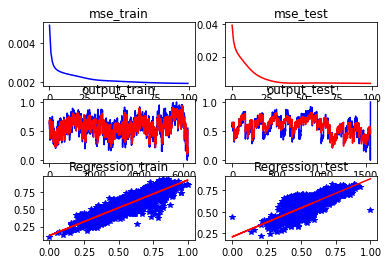

In [ ]:
def two_layer_peceptron(eta,epoch,l1_nuerons,l2_nuerons,f,f_prime):
    # x_train,x_test,y_train,y_test=spilit_data(data)
    input_dim=np.shape(x_train)[1]
    w1=np.random.uniform (low=-1,high=1,size=(input_dim,l1_nuerons) )
    w2=np.random.uniform (low=-1,high=1,size=(l1_nuerons,l2_nuerons) )
    mse_train=[]
    mse_test=[]

    for i in range(epoch):
      sqr_err_epoch_train=[]
      sqr_err_epoch_test=[]
      output_train=[]
      output_test=[]
      for j in range(np.shape(x_train)[0]):
#__________________feed forward
#------------------first layer
          net1=np.matmul(x_train[j],w1)
          o1=f(net1)
#------------------second layer
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=net2
          output_train.append(o2[0])
#___________________error
          err=y_train[j]-o2[0]
          sqr_err_epoch_train.append(err**2)
          f_deviation = f_prime(net1)
          w2_f_deviation=np.matmul(f_deviation,w2)
          w2_f_deviation_x=np.matmul(w2_f_deviation,np.transpose(np.reshape(x_train[j],(-1,1))))
          w1=np.subtract(w1,np.transpose(( eta * err*-1*1 *w2_f_deviation_x)))
          w2=np.subtract(w2,(eta * err* -1 * 1 * o1))
      mse_epoch_train= 0.5 *(sum(sqr_err_epoch_train)/np.shape(x_train)[0])
      mse_train.append(mse_epoch_train)
#______________________test
      for j in range(np.shape(x_test)[0]):
          net1=np.matmul(x_test[j],w1)
          o1=f(net1)
#---------------------second layer
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=net2
          output_test.append(o2[0])
#______________________error
          err=y_test[j]-o2[0]
          sqr_err_epoch_test.append(err**2)
      mse_epoch_test= 0.5 *(sum(sqr_err_epoch_test)/np.shape(x_test)[0])
      mse_test.append(mse_epoch_test)
#_____________________plot
    m_train,b_train = np.polyfit(y_train,output_train,1)
    m_test,b_test = np.polyfit(y_test,output_test,1)

    fig,axs = plt.subplots(3,2)
    axs[0,0].plot(mse_train,'b')
    axs[0,0].set_title('mse_train')
    axs[0,1].plot(mse_test,'r')
    axs[0,1].set_title('mse_test')

    axs[1,0].plot(y_train,'b')
    axs[1,0].plot(output_train,'r')
    axs[1,0].set_title('output_train')
    axs[1,1].plot(y_test,'b')
    axs[1,1].plot(output_test,'r')
    axs[1,1].set_title('output_test')

    axs[2,0].plot(y_train,output_train,'b*')
    axs[2,0].plot(y_train,m_train*y_train+b_train,'r')
    axs[2,0].set_title('Regression_train')
    axs[2,1].plot(y_test,output_test,'b*')
    axs[2,1].plot(y_test,m_test*y_test+b_test,'r')
    axs[2,1].set_title('Regression_test')

    plt.show()
    plt.close(fig)
#_________________call function
eta,epoch,l1_nuerons,l2_nuerons,f,f_prime=0.01,100,8,1,sigmoid,sigmoid_deriviate
two_layer_peceptron(eta,epoch,l1_nuerons,l2_nuerons,f,f_prime)

perceptron neural network with 3 layers:

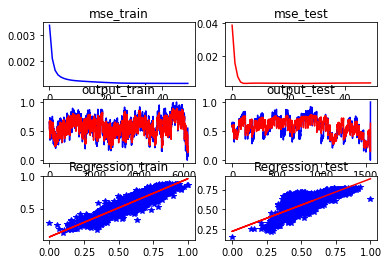

In [ ]:
x_train,x_test,y_train,y_test=spilit_data(data)
def three_layer_perceptron(eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime):
    # x_train,x_test,y_train,y_test=spilit_data(data)
    input_dim=np.shape(x_train)[1]
    w1=np.random.uniform (low=-1,high=1,size=(input_dim,l1_nuerons) )
    w2=np.random.uniform (low=-1,high=1,size=(l1_nuerons,l2_nuerons) )
    w3=np.random.uniform (low=-1,high=1,size=(l2_nuerons,l3_nuerons) )
    mse_train=[]
    mse_test=[]
    for i in range(epoch):
       sqr_err_epoch_train=[]
       sqr_err_epoch_test=[]
       output_train=[]
       output_test=[]
       for j in range(np.shape(x_train)[0]):
#______________________feed forward
#----------------------first layer
          net1=np.matmul(x_train[j],w1)
          o1=f1(net1)
#----------------------second layer
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=f1(net2)
#----------------------third layer
          o2=np.reshape(o2,(-1,1))
          net3=np.matmul(np.transpose(o2),w3)
          o3=net3
          output_train.append(o3[0])
#_______________________error
          err=y_train[j]-o3[0]
          sqr_err_epoch_train.append(err**2)
#_______________________backpropagation
          f1_deviation = f1_prime(net1)
          f2_deviation = f1_prime(net2)
          w2_f1_deviation=np.matmul(f1_deviation,w2)
          w3_f2_deviation=np.matmul(f2_deviation,w3)
          w3_f2_deviation_o1=np.matmul(w3_f2_deviation,np.transpose(np.reshape(o1,(-1,1))))
          w3_f2_deviation_w2_f1_deviation=np.matmul(w2_f1_deviation,w3_f2_deviation)
          w3_f2_deviation_w2_f1_deviation_x=np.matmul(w3_f2_deviation_w2_f1_deviation,np.transpose((np.reshape(x_train[j],(-1,1)))))
          w1=np.subtract(w1,np.transpose(( eta * err*-1*1 *w3_f2_deviation_w2_f1_deviation_x)))
          w2=(np.subtract((w2),np.transpose(( eta * err*-1*1 *w3_f2_deviation_o1))))
          w3=np.subtract(w3,(eta * err* -1 * 1 * o2))
       mse_epoch_train= 0.5 *(sum(sqr_err_epoch_train)/np.shape(x_train)[0])
       mse_train.append(mse_epoch_train)
#_______________________test
       for j in range(np.shape(x_test)[0]):
#-----------------------first layer
         net1=np.matmul(x_test[j],w1)
         o1=f1(net1)
#-----------------------second layer
         o1=np.reshape(o1,(-1,1))
         net2=np.matmul(np.transpose(o1),w2)
         o2=f1(net2)
#-----------------------third layer
         o2=np.reshape(o2,(-1,1))
         net3=np.matmul(np.transpose(o2),w3)
         o3=net3
         output_test.append(o3[0])
#_______________________error
         err=y_test[j]-o3[0]
         sqr_err_epoch_test.append(err**2)
       mse_epoch_test= 0.5 *(sum(sqr_err_epoch_test)/np.shape(x_test)[0])
       mse_test.append(mse_epoch_test)
#_____________________plot
    m_train,b_train = np.polyfit(y_train,output_train,1)
    m_test,b_test = np.polyfit(y_test,output_test,1)

    fig,axs = plt.subplots(3,2)
    axs[0,0].plot(mse_train,'b')
    axs[0,0].set_title('mse_train')
    axs[0,1].plot(mse_test,'r')
    axs[0,1].set_title('mse_test')

    axs[1,0].plot(y_train,'b')
    axs[1,0].plot(output_train,'r')
    axs[1,0].set_title('output_train')
    axs[1,1].plot(y_test,'b')
    axs[1,1].plot(output_test,'r')
    axs[1,1].set_title('output_test')

    axs[2,0].plot(y_train,output_train,'b*')
    axs[2,0].plot(y_train,m_train*y_train+b_train,'r')
    axs[2,0].set_title('Regression_train')
    axs[2,1].plot(y_test,output_test,'b*')
    axs[2,1].plot(y_test,m_test*y_test+b_test,'r')
    axs[2,1].set_title('Regression_test')

    plt.show()
    plt.close(fig)

eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime=0.1,50,5,3,1,sigmoid,sigmoid_deriviate
three_layer_perceptron(eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime)


Auto encoder_3 layer with 2 layer perceptron_local

In [ ]:
def autoencoder(x_train,x_test,l1_nuerons,epoch,f1,f1_prime,eta):
    input_dim=np.shape(x_train)[1]
    w_e1=np.random.uniform (low=-1,high=1,size=(input_dim,l1_nuerons) )
    w_d1=w_e1.T
    mse_train=[]
    mse_test=[]
    for i in range(epoch):
       sqr_err_epoch_train=[]
       sqr_err_epoch_test=[]
       output_train=[]
       output_test=[]
       output_encoder_train=[]
       output_encoder_test=[]
       for j in range(np.shape(x_train)[0]):
#______________________layer 1
#______________________feedforward
#----------------------encoder 1
          net_e1=np.matmul(x_train[j],w_e1)
          h1=f1(net_e1)
          output_encoder_train.append(h1)
#----------------------decoder 1
          h1=np.reshape(h1,(-1,1))
          net_d1=np.matmul(np.transpose(h1),w_d1)
          x_hat=f1(net_d1)
          output_train.append(x_hat[0])
#_______________________error
          err=x_train[j]-x_hat[0]
          sqr_err_epoch_train.append(err**2)
#_______________________backpropagation
          f_d1 = f1_prime(net_d1)
          delta_d=eta*(np.dot(np.dot(np.reshape(err,(1,-1)),f_d1).T,h1.T)).T
          w_d1=np.subtract(w_d1,delta_d)
          w_e1=w_d1.T
    mse_epoch_train= 0.5 *(sum(sqr_err_epoch_train)/np.shape(x_train)[0])
    mse_train.append(mse_epoch_train)
#_____________________test
#______________________feedforward
#----------------------encoder 1
    for j in range(np.shape(x_test)[0]):
          net_e1=np.matmul(x_test[j],w_e1)
          h1=f1(net_e1)
          output_encoder_test.append(h1)
#----------------------decoder 1
          h1=np.reshape(h1,(-1,1))
          net_d1=np.matmul(np.transpose(h1),w_d1)
          x_hat=f1(net_d1)
          output_test.append(x_hat[0])
#_______________________error
          err=x_test[j]-x_hat[0]
          sqr_err_epoch_test.append(err**2)
    return output_encoder_train,output_encoder_test,w_e1


In [ ]:
def stack_Autoencoder(data,eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,f1,f1_prime):
  x_train,x_test,y_train,y_test=spilit_data(data)
  x_train,x_test,w_e1=autoencoder(x_train,x_test,en_1,epoch,f1,f1_prime,eta)
  x_train,x_test,w_e2=autoencoder(x_train,x_test,en_2,epoch,f1,f1_prime,eta)
  x_train,x_test,w_e3=autoencoder(x_train,x_test,en_3,epoch,f1,f1_prime,eta)
  two_layer_peceptron(eta,epoch,l1_nuerons,l2_nuerons,f,f_prime)
  return w_e1,w_e2,w_e3

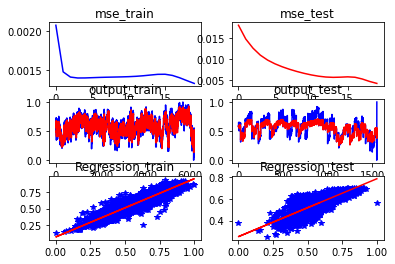

In [ ]:
w_e1,w_e2,w_e3=stack_Autoencoder(data,0.1,20,15,10,7,3,1 ,sigmoid,sigmoid_deriviate)

Auto encoder_3 layer with 2 layer perceptron_global

In [ ]:
def stack_Autoencoder_global(data,eta,epoch,en_1,en_2,en_3,f1,f1_prime):
  x_train,x_test,y_train,y_test=spilit_data(data)
  x_train,x_test,w_e1=autoencoder(x_train,x_test,en_1,epoch,f1,f1_prime,eta)
  x_train,x_test,w_e2=autoencoder(x_train,x_test,en_2,epoch,f1,f1_prime,eta)
  x_train,x_test,w_e3=autoencoder(x_train,x_test,en_3,epoch,f1,f1_prime,eta)
  return w_e1,w_e2,w_e3

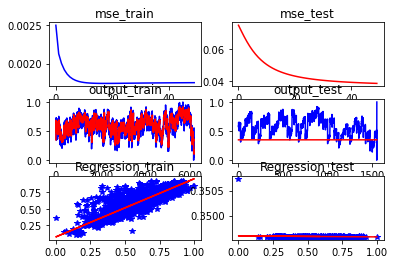

In [ ]:

def autoencoder_3layer_global(eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,f1,f1_prime):
    w_e1,w_e2,w_e3=stack_Autoencoder_global(data,eta,epoch,en_1,en_2,en_3 ,f1,f1_prime)
    w1=np.random.uniform (low=-1,high=1,size=(en_3,l1_nuerons) )
    w2=np.random.uniform (low=-1,high=1,size=(l1_nuerons,l2_nuerons) )
    mse_train=[]
    mse_test=[]
    for i in range(epoch):
       sqr_err_epoch_train=[]
       sqr_err_epoch_test=[]
       output_train=[]
       output_test=[]
       for j in range(np.shape(x_train)[0]):
#______________________layer 1
#______________________feedforward
#----------------------encoder 1
          net_e1=np.matmul(x_train[j],w_e1)
          h1=f1(net_e1)
#----------------------encoder 2
          h1=np.reshape(h1,(-1,1))
          net_e2=np.matmul(h1.T,w_e2)
          h2=f1(net_e2)
#----------------------encoder 3
          h2=np.reshape(h2,(-1,1))
          net_e3=np.matmul(h2.T,w_e3)
          h3=f1(net_e3)

#----------------------first layer perceptron
          h3=np.reshape(h3,(-1,1))
          net1=np.matmul(h3.T,w1)
          o1=f1(net1)
#----------------------second layer perceptron
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=net2
          output_train.append(o2[0])
#_______________________error
          err=y_train[j]-o2[0]
          sqr_err_epoch_train.append(err**2)
#_______________________backpropagation
          f_e1 = f1_prime(net_e1)
          f_e2 = f1_prime(net_e2)
          f_e3 = f1_prime(net_e3)
          f_p1 = f1_prime(net1)
          delta_p1=np.dot(h3,np.dot(f_p1,w2).T)
          delta_e3=np.dot(h2,np.dot(f_e3,np.dot(w1,np.dot(f_p1,w2))).T)
          delta_e2=np.dot(h1,np.dot(f_e2,np.dot(w_e3,np.dot(f_e3,np.dot(w1,np.dot(f_p1,w2))))).T)
          delta_e1=np.dot(np.reshape(x_train[j],(-1,1)),np.dot(f_e1,np.dot(w_e2,np.dot(f_e2,np.dot(w_e3,np.dot(f_e3,np.dot(w1,np.dot(f_p1,w2))))))).T)

          w_e1=np.subtract(w_e1,(eta * err* delta_e1))
          w_e2=np.subtract(w_e2,(eta * err* delta_e2))
          w_e3=np.subtract(w_e3,(eta * err* delta_e3))
          w1=np.subtract(w1,(eta * err* delta_p1))
          w2=np.subtract(w2,(eta * err* -1 * 1 * o1))
       mse_epoch_train= 0.5 *(sum(sqr_err_epoch_train)/np.shape(x_train)[0])
       mse_train.append(mse_epoch_train)
#_______________________test
       for j in range(np.shape(x_test)[0]):
#-----------------------first layer
#----------------------encoder 1
          net_e1=np.matmul(x_test[j],w_e1)
          h1=f1(net_e1)
#----------------------encoder 2
          h1=np.reshape(h1,(-1,1))
          net_e2=np.matmul(h1.T,w_e2)
          h2=f1(net_e2)
#----------------------encoder 3
          h2=np.reshape(h2,(-1,1))
          net_e3=np.matmul(h2.T,w_e3)
          h3=f1(net_e3)

#----------------------first layer perceptron
          h3=np.reshape(h3,(-1,1))
          net1=np.matmul(h3.T,w1)
          o1=f1(net1)
#----------------------second layer perceptron
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=net2
          output_test.append(o2[0])
#_______________________error
          err=y_test[j]-o2[0]
          sqr_err_epoch_test.append(err**2)
       mse_epoch_test= 0.5 *(sum(sqr_err_epoch_test)/np.shape(x_test)[0])
       mse_test.append(mse_epoch_test)
#_____________________plot
    m_train,b_train = np.polyfit(y_train,output_train,1)
    m_test,b_test = np.polyfit(y_test,output_test,1)

    fig,axs = plt.subplots(3,2)
    axs[0,0].plot(mse_train,'b')
    axs[0,0].set_title('mse_train')
    axs[0,1].plot(mse_test,'r')
    axs[0,1].set_title('mse_test')

    axs[1,0].plot(y_train,'b')
    axs[1,0].plot(output_train,'r')
    axs[1,0].set_title('output_train')
    axs[1,1].plot(y_test,'b')
    axs[1,1].plot(output_test,'r')
    axs[1,1].set_title('output_test')

    axs[2,0].plot(y_train,output_train,'b*')
    axs[2,0].plot(y_train,m_train*y_train+b_train,'r')
    axs[2,0].set_title('Regression_train')
    axs[2,1].plot(y_test,output_test,'b*')
    axs[2,1].plot(y_test,m_test*y_test+b_test,'r')
    axs[2,1].set_title('Regression_test')

    plt.show()
    plt.close(fig)

eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,f1,f1_prime=0.1,50,22,10,7,5,1,sigmoid,sigmoid_deriviate
# three_layer_perceptron(eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime)
autoencoder_3layer_global(eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,f1,f1_prime)


Autoencoder with 3 layer and 3 layer perceptron-local

In [ ]:
def stack_Autoencoder_3layer_perceptron(data,eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime):
  x_train,x_test,y_train,y_test=spilit_data(data)
  x_train,x_test=autoencoder(x_train,x_test,en_1,epoch,f1,f1_prime,eta)
  x_train,x_test=autoencoder(x_train,x_test,en_2,epoch,f1,f1_prime,eta)
  x_train,x_test=autoencoder(x_train,x_test,en_3,epoch,f1,f1_prime,eta)
  three_layer_perceptron(eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime)
  return

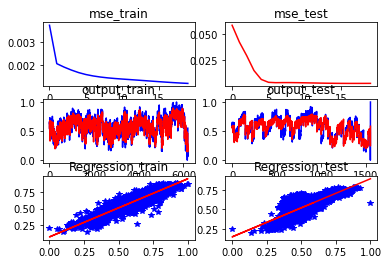

In [ ]:
stack_Autoencoder_3layer_perceptron(data,0.1,20,15,10,7,5,3,1 ,sigmoid,sigmoid_deriviate)

3-layer Autoencoder with 3_layer perceptron - global

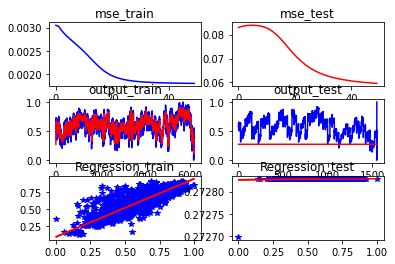

In [ ]:
# x_train,x_test,y_train,y_test=spilit_data(data)
def autoencoder_3layer_global(eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime):
    # x_train,x_test,y_train,y_test=spilit_data(data)
    # input_dim=np.shape(x_train)[1]
    # w_e1=np.random.uniform (low=-1,high=1,size=(input_dim,en_1) )
    # w_e2=np.random.uniform (low=-1,high=1,size=(en_1,en_2) )
    # w_e3=np.random.uniform (low=-1,high=1,size=(en_2,en_3) )
    w_e1,w_e2,w_e3=stack_Autoencoder_global(data,eta,epoch,en_1,en_2,en_3 ,f1,f1_prime)
    w1=np.random.uniform (low=-1,high=1,size=(en_3,l1_nuerons) )
    w2=np.random.uniform (low=-1,high=1,size=(l1_nuerons,l2_nuerons) )
    w3=np.random.uniform (low=-1,high=1,size=(l2_nuerons,l3_nuerons) )
    mse_train=[]
    mse_test=[]
    for i in range(epoch):
       sqr_err_epoch_train=[]
       sqr_err_epoch_test=[]
       output_train=[]
       output_test=[]
       for j in range(np.shape(x_train)[0]):
#______________________layer 1
#______________________feedforward
#----------------------encoder 1
          net_e1=np.matmul(x_train[j],w_e1)
          h1=f1(net_e1)
#----------------------encoder 2
          h1=np.reshape(h1,(-1,1))
          net_e2=np.matmul(h1.T,w_e2)
          h2=f1(net_e2)
#----------------------encoder 3
          h2=np.reshape(h2,(-1,1))
          net_e3=np.matmul(h2.T,w_e3)
          h3=f1(net_e3)

#----------------------first layer perceptron
          h3=np.reshape(h3,(-1,1))
          net1=np.matmul(h3.T,w1)
          o1=f1(net1)
#----------------------second layer perceptron
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=f1(net2)
#----------------------third layer perceptron
          o2=np.reshape(o2,(-1,1))
          net3=np.matmul(np.transpose(o2),w3)
          o3=net3
          output_train.append(o3[0])
#_______________________error
          err=y_train[j]-o3[0]
          sqr_err_epoch_train.append(err**2)
#_______________________backpropagation
          f_e1 = f1_prime(net_e1)
          f_e2 = f1_prime(net_e2)
          f_e3 = f1_prime(net_e3)
          f_p1 = f1_prime(net1)
          f_p2 = f1_prime(net2)
          delta_p2=np.dot(o1,np.dot(f_p2,w3).T)
          delta_p1=np.dot(h3,np.dot(f_p1,np.dot(w2,np.dot(f_p2,w3))).T)
          delta_e3=np.dot(h2,np.dot(f_e3,np.dot(w1,np.dot(f_p1,np.dot(w2,np.dot(f_p2,w3))))).T)
          delta_e2=np.dot(h1,np.dot(f_e2,np.dot(w_e3,np.dot(f_e3,np.dot(w1,np.dot(f_p1,np.dot(w2,np.dot(f_p2,w3))))))).T)
          delta_e1=np.dot(np.reshape(x_train[j],(-1,1)),np.dot(f_e1,np.dot(w_e2,np.dot(f_e2,np.dot(w_e3,np.dot(f_e3,np.dot(w1,np.dot(f_p1,np.dot(w2,np.dot(f_p2,w3))))))))).T)

          w_e1=np.subtract(w_e1,(eta * err* delta_e1))
          w_e2=np.subtract(w_e2,(eta * err* delta_e2))
          w_e3=np.subtract(w_e3,(eta * err* delta_e3))
          w1=np.subtract(w1,(eta * err* delta_p1))
          w2=np.subtract(w2,(eta * err* delta_p2))
          w3=np.subtract(w3,(eta * err* -1 * 1 * o2))
       mse_epoch_train= 0.5 *(sum(sqr_err_epoch_train)/np.shape(x_train)[0])
       mse_train.append(mse_epoch_train)
#_______________________test
       for j in range(np.shape(x_test)[0]):
#-----------------------first layer
#----------------------encoder 1
          net_e1=np.matmul(x_test[j],w_e1)
          h1=f1(net_e1)
#----------------------encoder 2
          h1=np.reshape(h1,(-1,1))
          net_e2=np.matmul(h1.T,w_e2)
          h2=f1(net_e2)
#----------------------encoder 3
          h2=np.reshape(h2,(-1,1))
          net_e3=np.matmul(h2.T,w_e3)
          h3=f1(net_e3)

#----------------------first layer perceptron
          h3=np.reshape(h3,(-1,1))
          net1=np.matmul(h3.T,w1)
          o1=f1(net1)
#----------------------second layer perceptron
          o1=np.reshape(o1,(-1,1))
          net2=np.matmul(np.transpose(o1),w2)
          o2=f1(net2)
#----------------------third layer perceptron
          o2=np.reshape(o2,(-1,1))
          net3=np.matmul(np.transpose(o2),w3)
          o3=net3
          output_test.append(o3[0])
#_______________________error
          err=y_test[j]-o3[0]
          sqr_err_epoch_test.append(err**2)
       mse_epoch_test= 0.5 *(sum(sqr_err_epoch_test)/np.shape(x_test)[0])
       mse_test.append(mse_epoch_test)
#_____________________plot
    m_train,b_train = np.polyfit(y_train,output_train,1)
    m_test,b_test = np.polyfit(y_test,output_test,1)

    fig,axs = plt.subplots(3,2)
    axs[0,0].plot(mse_train,'b')
    axs[0,0].set_title('mse_train')
    axs[0,1].plot(mse_test,'r')
    axs[0,1].set_title('mse_test')

    axs[1,0].plot(y_train,'b')
    axs[1,0].plot(output_train,'r')
    axs[1,0].set_title('output_train')
    axs[1,1].plot(y_test,'b')
    axs[1,1].plot(output_test,'r')
    axs[1,1].set_title('output_test')

    axs[2,0].plot(y_train,output_train,'b*')
    axs[2,0].plot(y_train,m_train*y_train+b_train,'r')
    axs[2,0].set_title('Regression_train')
    axs[2,1].plot(y_test,output_test,'b*')
    axs[2,1].plot(y_test,m_test*y_test+b_test,'r')
    axs[2,1].set_title('Regression_test')

    plt.show()
    plt.close(fig)

eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime=0.1,50,15,10,7,5,3,1,sigmoid,sigmoid_deriviate
# three_layer_perceptron(eta,epoch,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime)
autoencoder_3layer_global(eta,epoch,en_1,en_2,en_3,l1_nuerons,l2_nuerons,l3_nuerons,f1,f1_prime)
